In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [12]:
df = pd.read_csv('Social_Network_Ads.csv')

In [13]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [29]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [14]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df1=pd.get_dummies(df)
df1.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [16]:
X = df1[['Gender_Female','Gender_Female','Age', 'EstimatedSalary']] .values  #.astype(float)
X[0:5]

array([[    0,     0,    19, 19000],
       [    0,     0,    35, 20000],
       [    1,     1,    26, 43000],
       [    1,     1,    27, 57000],
       [    0,     0,    19, 76000]], dtype=int64)

In [17]:
Y = df['Purchased'].values
Y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (320, 4) (320,)
Test set: (80, 4) (80,)


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [22]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, yhat))

Train set Accuracy:  0.890625
Test set Accuracy:  0.8


In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cnf_matrix = confusion_matrix(Y_test,yhat)

In [25]:
cnf_matrix

array([[51,  8],
       [ 8, 13]], dtype=int64)

In [30]:
(51+13)/(51+8+8+13)

0.8

# SVM

In [38]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [39]:
X = df1[['Gender_Female','Gender_Female','Age', 'EstimatedSalary']] .values  #.astype(float)
X[0:5]

array([[    0,     0,    19, 19000],
       [    0,     0,    35, 20000],
       [    1,     1,    26, 43000],
       [    1,     1,    27, 57000],
       [    0,     0,    19, 76000]], dtype=int64)

In [40]:
Y = df['Purchased'].values
Y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train, x_test, y_train, y_test

(array([[     0,      0,     48,  74000],
        [     1,      1,     32,  86000],
        [     0,      0,     37,  74000],
        ...,
        [     1,      1,     36, 126000],
        [     0,      0,     28, 123000],
        [     0,      0,     38,  51000]], dtype=int64),
 array([[     1,      1,     43, 133000],
        [     1,      1,     46,  82000],
        [     1,      1,     56, 104000],
        [     1,      1,     31,  68000],
        [     1,      1,     33,  28000],
        [     1,      1,     21,  16000],
        [     1,      1,     40,  72000],
        [     0,      0,     35,  55000],
        [     1,      1,     44, 139000],
        [     1,      1,     39,  75000],
        [     1,      1,     31,  71000],
        [     1,      1,     46,  74000],
        [     0,      0,     36, 125000],
        [     0,      0,     22,  18000],
        [     0,      0,     40,  75000],
        [     1,      1,     52,  38000],
        [     1,      1,     20,  23000],
      

In [33]:
from sklearn.svm import SVC

In [34]:
clf = SVC(kernel='rbf').fit(x_train, y_train)

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
y_hat = clf.predict(x_test)
y_hat

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
cnf = confusion_matrix(y_hat, y_test)
cnf

array([[51, 25],
       [ 2,  2]], dtype=int64)

In [37]:
cnf[0][0]+cnf[1][1]

53

# Decision Tree

In [41]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn import tree

In [42]:
import matplotlib.pyplot as plt

In [43]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [44]:
X = df1[['Gender_Female','Gender_Female','Age', 'EstimatedSalary']] .values  #.astype(float)
X[0:5]

array([[    0,     0,    19, 19000],
       [    0,     0,    35, 20000],
       [    1,     1,    26, 43000],
       [    1,     1,    27, 57000],
       [    0,     0,    19, 76000]], dtype=int64)

In [45]:
Y = df['Purchased'].values
Y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [48]:
df1

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1
...,...,...,...,...,...,...
395,15691863,46,41000,1,1,0
396,15706071,51,23000,1,0,1
397,15654296,50,20000,1,1,0
398,15755018,36,33000,0,0,1


In [57]:
labels = df1.Purchased

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
obj = DecisionTreeClassifier()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(df1, X)

In [62]:
obj = obj.fit(x_train,y_train)

[Text(843.5602124357877, 1053.2250000000001, 'X[4] <= 0.5\ngini = 0.738\nsamples = 300\nvalue = [[144, 156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0]\n[144, 156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0]\n[5, 4, 3, 3, 5, 5, 8, 6, 11, 13, 11, 9, 8\n 8, 6, 6, 5, 22, 9, 13, 11, 10, 12, 12, 14, 2\n 2, 3, 7, 10, 12, 6, 4, 3, 4, 3, 2, 3, 2, 4\n 5, 4, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n 0, 0, 0, 0, 0, 0, 0, 0, 0

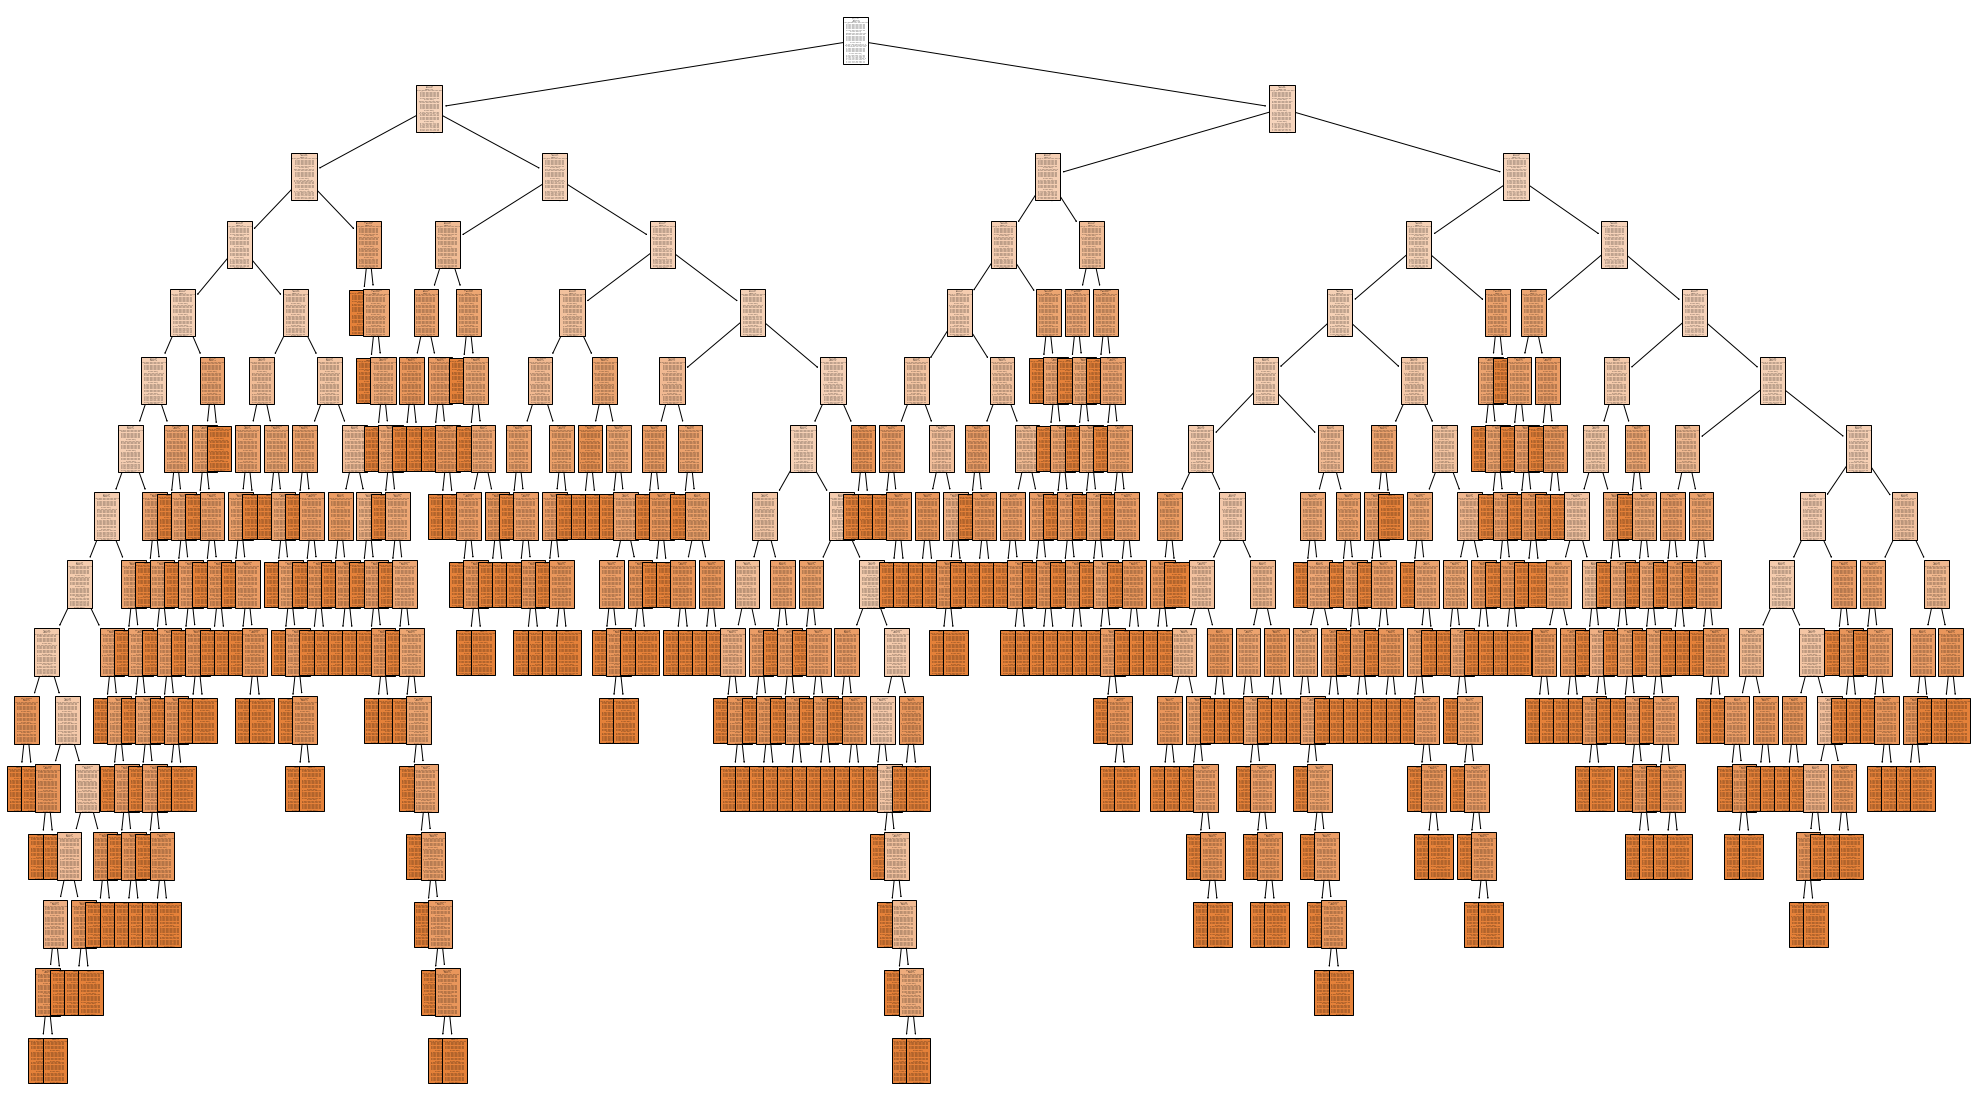

In [65]:
plt.figure(figsize = (35,20))
tree.plot_tree(obj, filled = True)

In [66]:
yhat = obj.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,x_test)

ValueError: multiclass-multioutput is not supported

In [69]:
yhat

array([[     0,      0,     26,  81000],
       [     0,      0,     19,  25000],
       [     0,      0,     46,  28000],
       [     1,      1,     32, 150000],
       [     0,      0,     35,  75000],
       [     0,      0,     36,  60000],
       [     1,      1,     37,  78000],
       [     1,      1,     53,  82000],
       [     0,      0,     58, 144000],
       [     0,      0,     38,  51000],
       [     0,      0,     33,  31000],
       [     1,      1,     46,  74000],
       [     0,      0,     36,  99000],
       [     1,      1,     45,  45000],
       [     1,      1,     47, 144000],
       [     0,      0,     19,  25000],
       [     0,      0,     40,  65000],
       [     0,      0,     35,  88000],
       [     0,      0,     37,  53000],
       [     1,      1,     40,  72000],
       [     0,      0,     38,  71000],
       [     1,      1,     46,  74000],
       [     0,      0,     56,  60000],
       [     0,      0,     37, 144000],
       [     0, 

# Logistic

In [78]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [79]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [80]:
df1.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [81]:
X = df1[['Gender_Female','Gender_Female','Age', 'EstimatedSalary']] .values  #.astype(float)
X[0:5]

array([[    0,     0,    19, 19000],
       [    0,     0,    35, 20000],
       [    1,     1,    26, 43000],
       [    1,     1,    27, 57000],
       [    0,     0,    19, 76000]], dtype=int64)

In [82]:
Y = df['Purchased'].values
Y[0:20]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 4) (320,)
Test set: (80, 4) (80,)


In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(max_iter = 500).fit(X_train,y_train)
LR

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [87]:
yhat_prob = LR.predict(X_test)
yhat_prob

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
cnf_matrix = confusion_matrix(y_test,yhat)

In [90]:
cnf_matrix

array([[54,  5],
       [ 3, 18]], dtype=int64)

In [91]:
(54+18)/(54+5+3+18)

0.9